In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set(style='whitegrid')

## Crosstab

In [2]:
df = pd.read_csv('../data/smoking.csv', delimiter=';')
df.head(5)

,Возраст,Пол,Должность,Курение
0,55,М,Ст. Менеджер,Да
1,28,Ж,Мл. Менеджер,Нет
2,27,М,Мл. Рабочий,Да
3,36,М,Ст. Рабочий,Да
4,50,Ж,Мл. Менеджер,Да


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Возраст    31 non-null     int64 
 1   Пол        31 non-null     object
 2   Должность  31 non-null     object
 3   Курение    31 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.1+ KB


#### Таблица сопряженности признаков "Пол" "Курение"

In [4]:
df_sex_smoke = pd.crosstab(df['Пол'], df['Курение'])
df_sex_smoke

Курение,Да,Нет
Пол,,
Ж,3,11
М,13,4


#### Таблица сопряженности признаков "Должность" "Курение"

In [5]:
df_position_smoke = pd.crosstab(df['Должность'], df['Курение'])
df_position_smoke

Курение,Да,Нет
Должность,,
Мл. Менеджер,4,3
Мл. Рабочий,3,4
Ст. Менеджер,4,1
Ст. Рабочий,5,7


#### Добавим более обобщенную колонку должностей

In [6]:
df['Должность_общая'] = df['Должность'].str.split(expand=True)[1]
df.head()

,Возраст,Пол,Должность,Курение,Должность_общая
0,55,М,Ст. Менеджер,Да,Менеджер
1,28,Ж,Мл. Менеджер,Нет,Менеджер
2,27,М,Мл. Рабочий,Да,Рабочий
3,36,М,Ст. Рабочий,Да,Рабочий
4,50,Ж,Мл. Менеджер,Да,Менеджер


#### Таблица сопряженности признаков "Должность_общая" "Курение"

In [7]:
df_smoke = pd.crosstab(df['Должность_общая'], df['Курение'])
df_smoke

Курение,Да,Нет
Должность_общая,,
Менеджер,8,4
Рабочий,8,11


#### Еще один вариант

In [8]:
df['Должность_стмл'] = df['Должность'].str.split(expand=True)[0]
df.head()

,Возраст,Пол,Должность,Курение,Должность_общая,Должность_стмл
0,55,М,Ст. Менеджер,Да,Менеджер,Ст.
1,28,Ж,Мл. Менеджер,Нет,Менеджер,Мл.
2,27,М,Мл. Рабочий,Да,Рабочий,Мл.
3,36,М,Ст. Рабочий,Да,Рабочий,Ст.
4,50,Ж,Мл. Менеджер,Да,Менеджер,Мл.


In [9]:
df_smoke = pd.crosstab(df['Должность_стмл'], df['Курение'])
df_smoke

Курение,Да,Нет
Должность_стмл,,
Мл.,7,7
Ст.,9,8


## Графики

<AxesSubplot:>

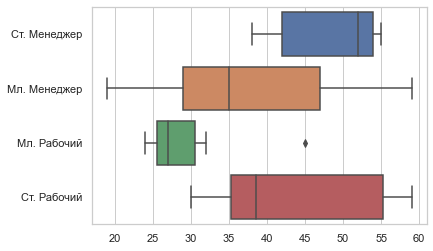

In [10]:
sns.boxplot(x=df['Возраст'].values, y=df['Должность'].values)

<AxesSubplot:ylabel='count'>

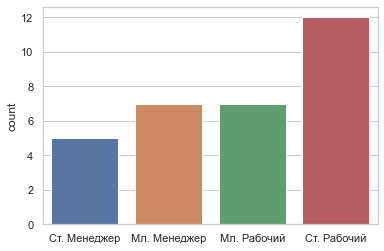

In [11]:
sns.countplot(x=df['Должность'].values)

<AxesSubplot:xlabel='Возраст', ylabel='Count'>

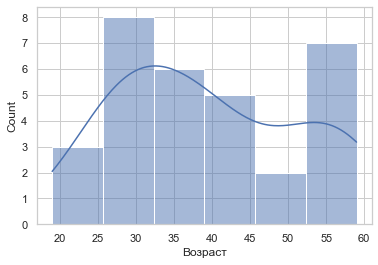

In [12]:
sns.histplot(x=df['Возраст'], kde=True)

## Cut qcut 

<AxesSubplot:xlabel='Возраст_cat', ylabel='count'>

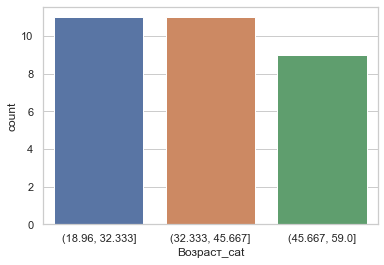

In [13]:
# Equal-width
df['Возраст_cat'] = pd.cut(df['Возраст'], bins=3)
sns.countplot(x=df['Возраст_cat'])

<AxesSubplot:xlabel='Возраст_qcat', ylabel='count'>

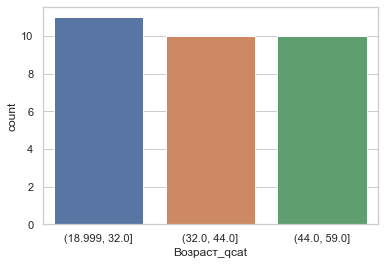

In [14]:
# Equal-height
df['Возраст_qcat'] = pd.qcut(df['Возраст'], 3)
sns.countplot(x=df['Возраст_qcat'])

## Критерий хи-квадрат 
Предназначен для проверки гипотезы H0: X и Y независимы против альтернатив H_а об их зависимости

In [15]:
a = np.array([
    [25, 5, 2],
    [30, 11, 5],
    [35, 12, 10]
])



n = a.sum()
m = len(a)
k = len(a[0])
a

array([[25,  5,  2],
       [30, 11,  5],
       [35, 12, 10]])

In [16]:
#хи-квадрат из scipy
s, p, d, mf = stats.chi2_contingency(a, correction=False)
print(s, "статистика хи-квадрат")
print(p, "p-значение")
print(d, "количество степеней свободы")
print(mf, "матрица ожидаемых частот")

3.7515811888256447 статистика хи-квадрат
0.4406682436539594 p-значение
4 количество степеней свободы
[[21.33333333  6.63703704  4.02962963]
 [30.66666667  9.54074074  5.79259259]
 [38.         11.82222222  7.17777778]] матрица ожидаемых частот


In [17]:
#Ручная реализация критерия хи-квадрат

#print(chi2, "хи-квадрат")

#p_value = 1 - stats.chi2.cdf(chi2, df=(m-1)*(k-1))
#print(p_value, "p-значение")

In [18]:
print(s,p)
# print(chi2, p_value)

3.7515811888256447 0.4406682436539594


## Мера связи Пирсона и Крамера

In [19]:
#Коэффициент взаимной сопряженности (коэффициент Пирсона)
#P = 

#Коэффициент Крамера
#C = 
#print(P,C)

## Пример (численные значения)

array([63, 27, 27, 53, 47, 22, 46, 22, 23, 67, 56, 62, 36, 21, 56, 28, 67,
       67, 68, 50, 41, 46, 41, 58, 57, 49, 36, 65, 44, 21, 30, 40, 62, 29,
       53, 43, 68, 32, 55, 29, 69, 69, 21, 36, 65, 27, 60, 35, 69, 65, 56,
       32, 37, 44, 67, 47, 38, 23, 56, 44, 52, 68, 36, 56, 41, 62, 44, 51,
       34, 53, 47, 30, 45, 51, 21, 52, 62, 32, 67, 47, 63, 43, 66, 37, 29,
       43, 36, 64, 53, 39, 33, 51, 30, 59, 31, 32, 40, 34, 31, 60])

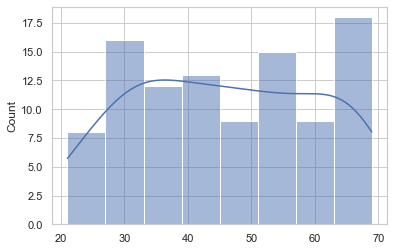

In [20]:
age = np.random.randint(20, 70, 100)
sns.histplot(age, kde=True)
age

<AxesSubplot:ylabel='Count'>

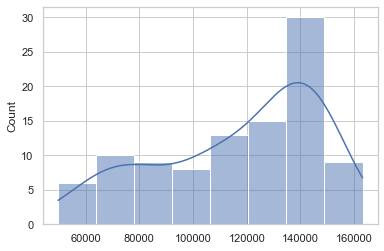

In [21]:
salary = 150_000 - 150*(age - 45)**2 + np.random.normal(0, 10000, size=age.size)
sns.histplot(salary, kde=True)

<AxesSubplot:>

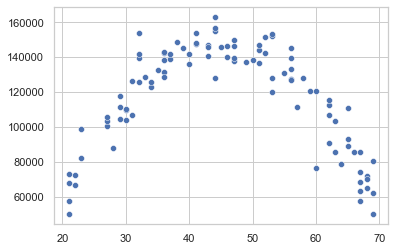

In [22]:
sns.scatterplot(x=age, y=salary)

In [23]:
stats.spearmanr(age, salary)

SpearmanrResult(correlation=-0.13952345233603744, pvalue=0.166213048276727)

In [24]:
age_cat = pd.qcut(age, 8)
sal_cat = pd.qcut(salary, 6)

In [25]:
age_cat

[(58.25, 65.0], (20.999, 29.0], (20.999, 29.0], (52.0, 58.25], (45.5, 52.0], ..., (29.0, 33.75], (33.75, 40.0], (33.75, 40.0], (29.0, 33.75], (58.25, 65.0]]
Length: 100
Categories (8, interval[float64]): [(20.999, 29.0] < (29.0, 33.75] < (33.75, 40.0] < (40.0, 45.5] < (45.5, 52.0] < (52.0, 58.25] < (58.25, 65.0] < (65.0, 69.0]]

In [26]:
sal_cat

[(79370.737, 106605.803], (79370.737, 106605.803], (79370.737, 106605.803], (126779.89, 138606.392], (145744.026, 163127.308], ..., (138606.392, 145744.026], (126779.89, 138606.392], (106605.803, 126779.89], (106605.803, 126779.89], (106605.803, 126779.89]]
Length: 100
Categories (6, interval[float64]): [(49812.65900000001, 79370.737] < (79370.737, 106605.803] < (106605.803, 126779.89] < (126779.89, 138606.392] < (138606.392, 145744.026] < (145744.026, 163127.308]]

<AxesSubplot:ylabel='count'>

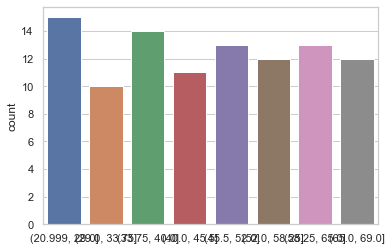

In [27]:
sns.countplot(x=age_cat)

<AxesSubplot:ylabel='count'>

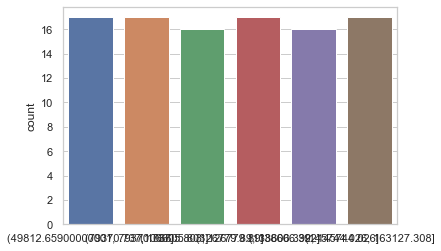

In [28]:
sns.countplot(x=sal_cat)

In [29]:
df=  pd.DataFrame(np.vstack([age_cat, sal_cat]).T, columns=['Age', 'Salary'])
df.head()

,Age,Salary
0,"(58.25, 65.0]","(79370.737, 106605.803]"
1,"(20.999, 29.0]","(79370.737, 106605.803]"
2,"(20.999, 29.0]","(79370.737, 106605.803]"
3,"(52.0, 58.25]","(126779.89, 138606.392]"
4,"(45.5, 52.0]","(145744.026, 163127.308]"


In [30]:
stats.chi2_contingency(pd.crosstab(df['Age'], df['Salary']))

(144.9585830835831,
 2.474719297899067e-15,
 35,
 array([[2.55, 2.55, 2.4 , 2.55, 2.4 , 2.55],
        [1.7 , 1.7 , 1.6 , 1.7 , 1.6 , 1.7 ],
        [2.38, 2.38, 2.24, 2.38, 2.24, 2.38],
        [1.87, 1.87, 1.76, 1.87, 1.76, 1.87],
        [2.21, 2.21, 2.08, 2.21, 2.08, 2.21],
        [2.04, 2.04, 1.92, 2.04, 1.92, 2.04],
        [2.21, 2.21, 2.08, 2.21, 2.08, 2.21],
        [2.04, 2.04, 1.92, 2.04, 1.92, 2.04]]))